In [116]:
from pandas import DataFrame, concat
from pandas import read_csv
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

In [117]:
dataset = read_csv('with_timestamp.csv', header=0, index_col=0)
dataset.drop(["@timestamp", "anomaly"], axis=1, inplace=True)
dataset.head()

,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.softirq.pct,system.cpu.system.pct,system.cpu.total.pct,system.cpu.user.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.request.merges_per_sec,...,jolokia.metrics.threading.thread_count,system.load.1,system.load.15,system.load.5,system.load.norm.1,system.load.norm.15,system.load.norm.5,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct
0,3.5818,0.0474,0.0312,0.1058,0.4182,0.2338,0.698,12.601,0.165,0.0,...,995,0.68,0.97,1.00,0.170,0.243,0.250,0.6904,0.0,0.9620
1,3.5080,0.0934,0.0271,0.1054,0.4920,0.2661,0.572,11.104,0.137,0.0,...,995,0.58,0.96,0.97,0.145,0.240,0.243,0.6903,0.0,0.9626
2,3.5337,0.1136,0.0291,0.1025,0.4663,0.2211,0.572,11.104,0.137,0.0,...,995,0.65,0.96,0.97,0.163,0.240,0.243,0.6904,0.0,0.9628
3,3.5742,0.0503,0.0201,0.0916,0.4258,0.2637,0.572,11.104,0.137,0.0,...,995,0.68,0.95,0.95,0.170,0.238,0.238,0.6903,0.0,0.9635
4,3.5454,0.0705,0.0268,0.1051,0.4546,0.2522,0.572,11.104,0.137,0.0,...,995,0.68,0.95,0.95,0.170,0.238,0.238,0.6905,0.0,0.9638


## Normalizing Data

In [118]:
dataset[dataset.columns] = StandardScaler().fit_transform(dataset)

## Shifting the dataset
shifting only one minute

In [119]:
dataset_shifted = dataset.shift(-1)
dataset = dataset.iloc[:-1]
dataset_shifted = dataset_shifted.iloc[:-1]

## Spliting the dataset 
Ratio - 80 : 20

In [120]:
train = dataset.shape[0] * 2 // 10
    
train_dataset = dataset.iloc[:-train]
train_dataset_shifted = dataset_shifted.iloc[:-train]

test_dataset = dataset.iloc[-train:]
test_dataset_shifted = dataset_shifted.iloc[-train:]

In [121]:
train_dataset = train_dataset.values.reshape((train_dataset.shape[0], 1, train_dataset.shape[1]))
print(train_dataset_shifted.shape)

(40000, 39)


## Training Models

### Feature Set 1
- system.cpu.iowait.pct'
- system.diskio_sda.iostat.await'
- system.diskio_sda.iostat.busy'
- system.diskio_sda.iostat.queue.avg_size'
- system.diskio_sda.iostat.read.request.merges_per_sec'
- system.diskio_sda.iostat.read.request.per_sec'
- system.diskio_sda.iostat.request.avg_size'
- system.diskio_sda.iostat.service_time'
- system.diskio_sda.iostat.write.request.merges_per_sec'
- system.diskio_sda.iostat.write.request.per_sec'
- system.diskio_sda2.iostat.await'
- system.diskio_sda2.iostat.busy'
- system.diskio_sda2.iostat.queue.avg_size'
- system.diskio_sda2.iostat.read.request.merges_per_sec'
- system.diskio_sda2.iostat.read.request.per_sec'
- system.diskio_sda2.iostat.request.avg_size'
- system.diskio_sda2.iostat.service_time'
- system.diskio_sda2.iostat.write.request.merges_per_sec'
- system.diskio_sda2.iostat.write.request.per_sec'

In [122]:
train_dataset_shifted_1 = train_dataset_shifted[[
    'system.cpu.iowait.pct',
    'system.diskio_sda.iostat.await',
    'system.diskio_sda.iostat.busy',
    'system.diskio_sda.iostat.queue.avg_size',
    'system.diskio_sda.iostat.read.request.merges_per_sec',
    'system.diskio_sda.iostat.read.request.per_sec',
    'system.diskio_sda.iostat.request.avg_size',
    'system.diskio_sda.iostat.service_time',
    'system.diskio_sda.iostat.write.request.merges_per_sec',
    'system.diskio_sda.iostat.write.request.per_sec',
    'system.diskio_sda2.iostat.await',
    'system.diskio_sda2.iostat.busy',
    'system.diskio_sda2.iostat.queue.avg_size',
    'system.diskio_sda2.iostat.read.request.merges_per_sec',
    'system.diskio_sda2.iostat.read.request.per_sec',
    'system.diskio_sda2.iostat.request.avg_size',
    'system.diskio_sda2.iostat.service_time',
    'system.diskio_sda2.iostat.write.request.merges_per_sec',
    'system.diskio_sda2.iostat.write.request.per_sec']]
train_dataset_shifted_1.head()

,system.cpu.iowait.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.request.merges_per_sec,system.diskio_sda.iostat.read.request.per_sec,system.diskio_sda.iostat.request.avg_size,system.diskio_sda.iostat.service_time,system.diskio_sda.iostat.write.request.merges_per_sec,system.diskio_sda.iostat.write.request.per_sec,system.diskio_sda2.iostat.await,system.diskio_sda2.iostat.busy,system.diskio_sda2.iostat.queue.avg_size,system.diskio_sda2.iostat.read.request.merges_per_sec,system.diskio_sda2.iostat.read.request.per_sec,system.diskio_sda2.iostat.request.avg_size,system.diskio_sda2.iostat.service_time,system.diskio_sda2.iostat.write.request.merges_per_sec,system.diskio_sda2.iostat.write.request.per_sec
0,0.088287,-0.145439,-0.200244,-0.120378,-0.036651,-0.060667,-0.145092,-0.19276,-0.060835,1.143935,-0.132459,-0.200173,-0.121455,-0.036656,-0.060681,-0.130237,-0.192853,-0.060835,1.151815
1,0.191904,-0.145439,-0.200244,-0.120378,-0.036651,-0.060667,-0.145092,-0.19276,-0.060835,1.143935,-0.132459,-0.200173,-0.121455,-0.036656,-0.060681,-0.130237,-0.192853,-0.060835,1.151815
2,-0.132798,-0.145439,-0.200244,-0.120378,-0.036651,-0.060667,-0.145092,-0.19276,-0.060835,1.143935,-0.132459,-0.200173,-0.121455,-0.036656,-0.060681,-0.130237,-0.192853,-0.060835,1.151815
3,-0.029181,-0.145439,-0.200244,-0.120378,-0.036651,-0.060667,-0.145092,-0.19276,-0.060835,1.143935,-0.132459,-0.200173,-0.121455,-0.036656,-0.060681,-0.130237,-0.192853,-0.060835,1.151815
4,-0.107150,-0.145439,-0.200244,-0.120378,-0.036651,-0.060667,-0.145092,-0.19276,-0.060835,1.143935,-0.132459,-0.200173,-0.121455,-0.036656,-0.060681,-0.130237,-0.192853,-0.060835,1.151815


In [123]:
model_lstm_1 = Sequential()
model_lstm_1.add(LSTM(10, input_shape=(1, train_dataset_shifted.shape[1])))
model_lstm_1.add(Dense(19))
model_lstm_1.compile(loss='mae', optimizer='adam')

model_lstm_1.fit(train_dataset, train_dataset_shifted_1, verbose=2, shuffle=False)

Epoch 1/1
 - 8s - loss: 0.1434


### Feature Set 2
- system.cpu.total.pct'
- system.cpu.user.pct'

In [124]:
train_dataset_shifted_2 = train_dataset_shifted[[
    'system.cpu.total.pct',
    'system.cpu.user.pct']]

train_dataset_shifted_2.head()

,system.cpu.total.pct,system.cpu.user.pct
0,-0.165047,-0.200633
1,-0.205200,-0.271265
2,-0.268477,-0.204400
3,-0.223480,-0.222451
4,-0.234417,-0.220410


In [125]:
model_lstm_2 = Sequential()
model_lstm_2.add(LSTM(10, input_shape=(1, train_dataset_shifted.shape[1])))
model_lstm_2.add(Dense(2))
model_lstm_2.compile(loss='mae', optimizer='adam')

model_lstm_2.fit(train_dataset, train_dataset_shifted_2, verbose=2, shuffle=False)

Epoch 1/1
 - 7s - loss: 0.1762


### Feature Set 3
- jolokia.metrics.memory.heap_memory_usage.committed'
- jolokia.metrics.memory.heap_memory_usage.max'

In [126]:
train_dataset_shifted_3 = train_dataset_shifted[[
    'jolokia.metrics.memory.heap_memory_usage.committed',
    'jolokia.metrics.memory.heap_memory_usage.max']]

train_dataset_shifted_3.head()

,jolokia.metrics.memory.heap_memory_usage.committed,jolokia.metrics.memory.heap_memory_usage.max
0,-0.360082,-0.360082
1,-0.360082,-0.360082
2,-0.360082,-0.360082
3,-0.360082,-0.360082
4,-0.360082,-0.360082


In [127]:
model_lstm_3 = Sequential()
model_lstm_3.add(LSTM(10, input_shape=(1, train_dataset_shifted.shape[1])))
model_lstm_3.add(Dense(2))
model_lstm_3.compile(loss='mae', optimizer='adam')

model_lstm_3.fit(train_dataset, train_dataset_shifted_3, verbose=2, shuffle=False)

Epoch 1/1
 - 7s - loss: 0.2577


### Feature Set 4
- system.load.1'
- system.load.15'
- system.load.5'
- system.load.norm.1'
- system.load.norm.15'
- system.load.norm.5'

In [128]:
train_dataset_shifted_4 = train_dataset_shifted[[
    'system.load.1',
    'system.load.15',
    'system.load.5',
    'system.load.norm.1',
    'system.load.norm.15',
    'system.load.norm.5']]

train_dataset_shifted_4.head()

,system.load.1,system.load.15,system.load.5,system.load.norm.1,system.load.norm.15,system.load.norm.5
0,-0.149537,-0.131554,-0.129193,-0.151976,-0.134432,-0.131700
1,-0.145677,-0.131554,-0.129193,-0.148006,-0.134432,-0.131700
2,-0.144023,-0.132378,-0.130401,-0.146463,-0.135091,-0.132908
3,-0.144023,-0.132378,-0.130401,-0.146463,-0.135091,-0.132908
4,-0.149537,-0.133203,-0.132214,-0.151976,-0.136080,-0.134842


In [129]:
model_lstm_4 = Sequential()
model_lstm_4.add(LSTM(10, input_shape=(1, train_dataset_shifted.shape[1])))
model_lstm_4.add(Dense(6))
model_lstm_4.compile(loss='mae', optimizer='adam')

model_lstm_4.fit(train_dataset, train_dataset_shifted_4, verbose=2, shuffle=False)

Epoch 1/1
 - 7s - loss: 0.1112


### Feature Set 5
- system.cpu.idle.pct'
- system.cpu.softirq.pct'
- system.cpu.system.pct'
- jolokia.metrics.memory.heap_memory_usage.used'
- jolokia.metrics.memory.non_heap_memory_usage.used'
- jolokia.metrics.threading.daemon_thread_count'
- jolokia.metrics.threading.thread_count'
- system.memory.actual.used.pct'
- system.memory.swap.used.pct'
- system.memory.used.pct'

In [130]:
train_dataset_shifted_5 = train_dataset_shifted[[
    'system.cpu.idle.pct',
    'system.cpu.softirq.pct',
    'system.cpu.system.pct',
    'jolokia.metrics.memory.heap_memory_usage.used',
    'jolokia.metrics.memory.non_heap_memory_usage.used',
    'jolokia.metrics.threading.daemon_thread_count',
    'jolokia.metrics.threading.thread_count',
    'system.memory.actual.used.pct',
    'system.memory.swap.used.pct',
    'system.memory.used.pct']]

train_dataset_shifted_5.head()

,system.cpu.idle.pct,system.cpu.softirq.pct,system.cpu.system.pct,jolokia.metrics.memory.heap_memory_usage.used,jolokia.metrics.memory.non_heap_memory_usage.used,jolokia.metrics.threading.daemon_thread_count,jolokia.metrics.threading.thread_count,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct
0,0.165047,0.117119,0.399871,1.185044,-1.669443,-0.793713,-1.115556,-1.046841,-0.078425,-0.359971
1,0.205200,0.612686,0.150216,1.185044,-1.669443,-0.793713,-1.115556,-1.042371,-0.078425,-0.345190
2,0.268477,-1.617364,-0.788138,1.185044,-1.669443,-0.793713,-1.115556,-1.046841,-0.078425,-0.293459
3,0.223480,0.042784,0.374044,1.185044,-1.669443,-0.793713,-1.115556,-1.037900,-0.078425,-0.271289
4,0.234417,0.389681,0.847526,1.185044,-1.669443,-0.793713,-1.115556,-1.042371,-0.078425,-0.271289


In [131]:
model_lstm_5 = Sequential()
model_lstm_5.add(LSTM(10, input_shape=(1, train_dataset_shifted.shape[1])))
model_lstm_5.add(Dense(10))
model_lstm_5.compile(loss='mae', optimizer='adam')

model_lstm_5.fit(train_dataset, train_dataset_shifted_5, verbose=2, shuffle=False)

Epoch 1/1
 - 7s - loss: 0.4157


## Predicting 

### set 1

In [132]:
test_dataset_predicted_1 = model_lstm_1.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [133]:
test_dataset_predicted_pd_1 = DataFrame(test_dataset_predicted_1)
test_dataset_predicted_pd_1.columns = train_dataset_shifted_1.columns

### set 2

In [134]:
test_dataset_predicted_2 = model_lstm_2.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [135]:
test_dataset_predicted_pd_2 = DataFrame(test_dataset_predicted_2)
test_dataset_predicted_pd_2.columns = train_dataset_shifted_2.columns

### set 3

In [136]:
test_dataset_predicted_3 = model_lstm_3.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [137]:
test_dataset_predicted_pd_3 = DataFrame(test_dataset_predicted_3)
test_dataset_predicted_pd_3.columns = train_dataset_shifted_3.columns

### set 4

In [138]:
test_dataset_predicted_4 = model_lstm_4.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [139]:
test_dataset_predicted_pd_4 = DataFrame(test_dataset_predicted_4)
test_dataset_predicted_pd_4.columns = train_dataset_shifted_4.columns

### set 5

In [140]:
test_dataset_predicted_5 = model_lstm_5.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [141]:
test_dataset_predicted_pd_5 = DataFrame(test_dataset_predicted_5)
test_dataset_predicted_pd_5.columns = train_dataset_shifted_5.columns

### Merging Predictions

In [142]:
test_dataset_predicted_pd = concat([
    test_dataset_predicted_pd_1, 
    test_dataset_predicted_pd_2, 
    test_dataset_predicted_pd_3,
    test_dataset_predicted_pd_4,
    test_dataset_predicted_pd_5], axis=1)

test_dataset_predicted_pd = test_dataset_predicted_pd.set_index(test_dataset_shifted.index)
test_dataset_predicted_pd.head()

,system.cpu.iowait.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.request.merges_per_sec,system.diskio_sda.iostat.read.request.per_sec,system.diskio_sda.iostat.request.avg_size,system.diskio_sda.iostat.service_time,system.diskio_sda.iostat.write.request.merges_per_sec,system.diskio_sda.iostat.write.request.per_sec,...,system.cpu.idle.pct,system.cpu.softirq.pct,system.cpu.system.pct,jolokia.metrics.memory.heap_memory_usage.used,jolokia.metrics.memory.non_heap_memory_usage.used,jolokia.metrics.threading.daemon_thread_count,jolokia.metrics.threading.thread_count,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct
40000,-0.133220,-0.119346,-0.159589,-0.103560,-0.039626,-0.055328,-0.059283,-0.109784,-0.148576,-0.140647,...,0.218564,0.182474,0.194896,-1.297804,0.815092,0.204019,-0.328912,-0.087809,-0.085455,0.131357
40001,-0.135238,-0.116486,-0.146597,-0.103229,-0.036332,-0.050636,-0.056007,-0.107378,-0.146608,-0.132188,...,0.214593,0.223650,0.261939,-1.335064,0.869843,0.206870,-0.352318,-0.141217,-0.086399,0.154573
40002,-0.131947,-0.119741,-0.157566,-0.102875,-0.040082,-0.053463,-0.058568,-0.107610,-0.147062,-0.130921,...,0.217817,0.161414,0.194649,-1.234267,0.802409,0.202244,-0.300355,-0.049512,-0.089732,0.145170
40003,-0.131772,-0.118811,-0.151256,-0.103361,-0.038009,-0.051423,-0.055429,-0.107744,-0.146777,-0.131455,...,0.216974,0.206227,0.230735,-1.286147,0.836051,0.204915,-0.332843,-0.104809,-0.086542,0.158643
40004,-0.133916,-0.117117,-0.146894,-0.103184,-0.037065,-0.050735,-0.055938,-0.107883,-0.145584,-0.127125,...,0.218876,0.222736,0.254042,-1.304783,0.856119,0.204722,-0.333585,-0.119142,-0.089665,0.168734


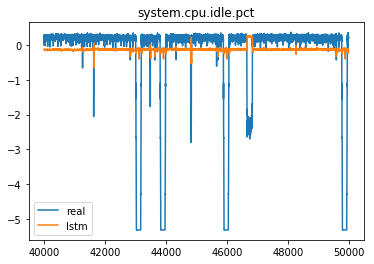

Mean Absolute Error :  0.7000404357716961


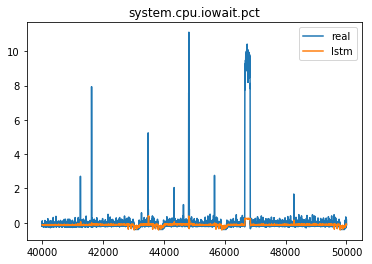

Mean Absolute Error :  0.2485223234930669


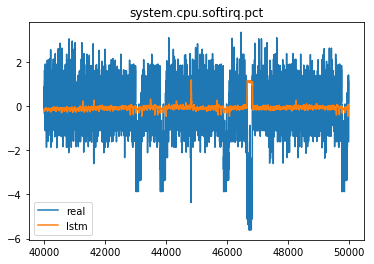

Mean Absolute Error :  0.8200787957963039


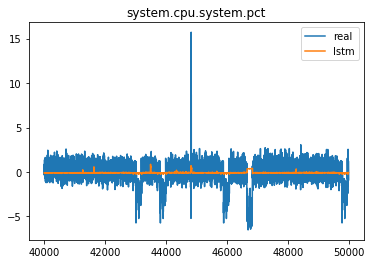

Mean Absolute Error :  0.7868310325253702


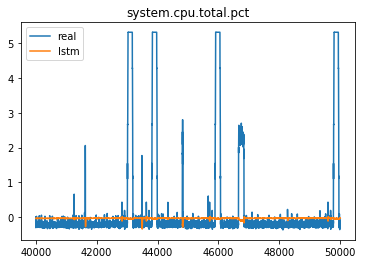

Mean Absolute Error :  0.566252175636971


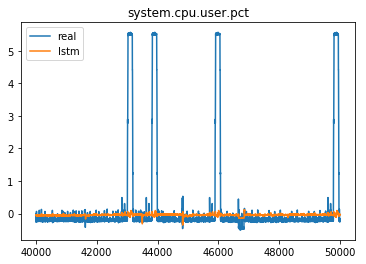

Mean Absolute Error :  0.5075932517614481


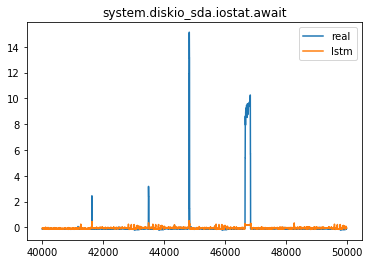

Mean Absolute Error :  0.24150383526048308


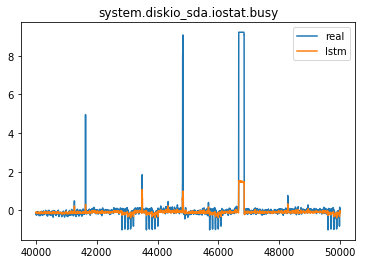

Mean Absolute Error :  0.23539058768336263


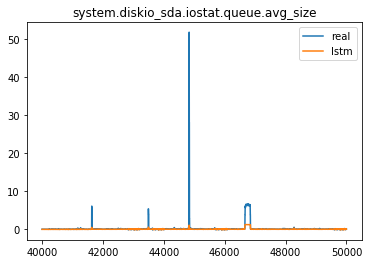

Mean Absolute Error :  0.21345553649433316


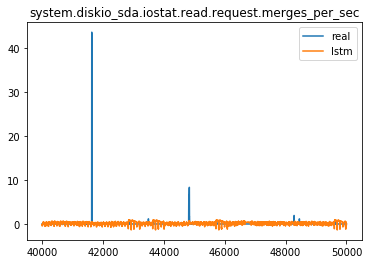

Mean Absolute Error :  0.3684803252353551


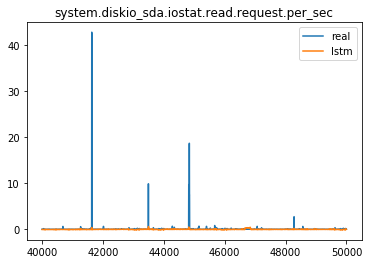

Mean Absolute Error :  0.11815435115645614


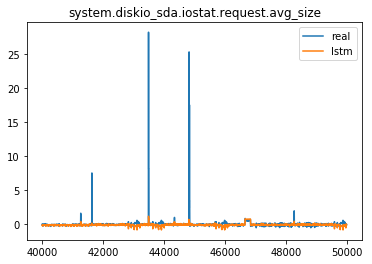

Mean Absolute Error :  0.1747649663138714


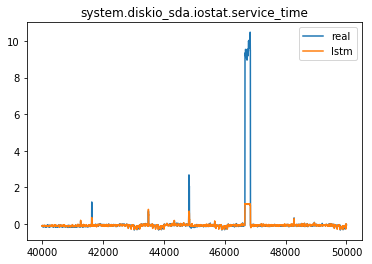

Mean Absolute Error :  0.17781883490854503


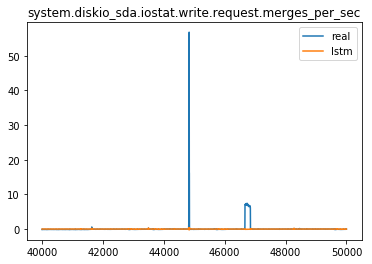

Mean Absolute Error :  0.23279388582675448


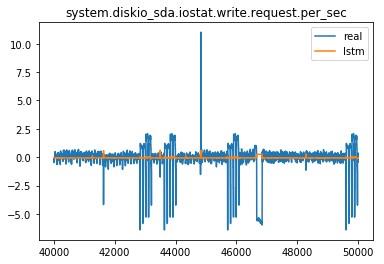

Mean Absolute Error :  0.5870440610693445


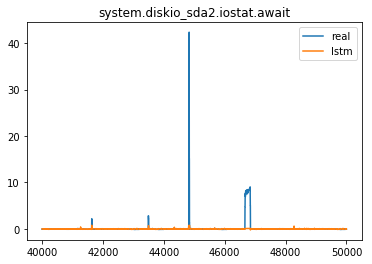

Mean Absolute Error :  0.2285203150665651


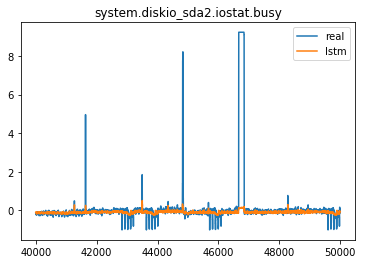

Mean Absolute Error :  0.2619965286125152


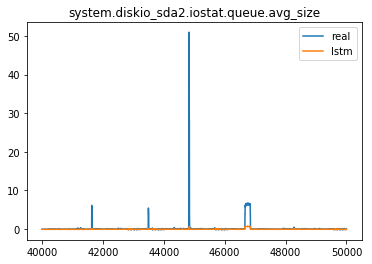

Mean Absolute Error :  0.2303705219777781


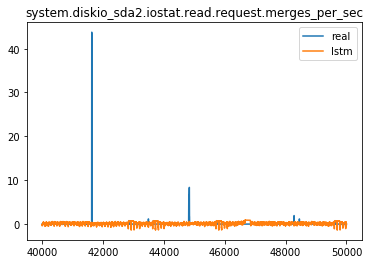

Mean Absolute Error :  0.35211263120408165


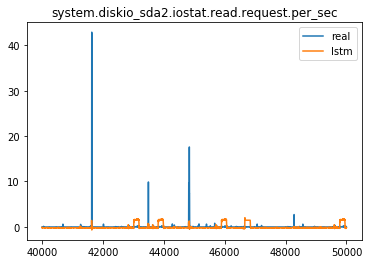

Mean Absolute Error :  0.3520531777209749


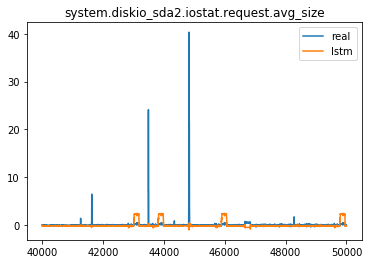

Mean Absolute Error :  0.36954541193591656


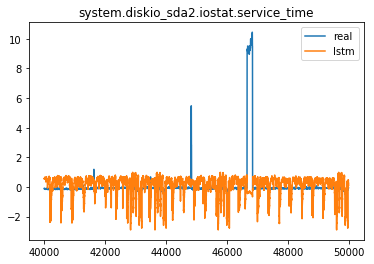

Mean Absolute Error :  0.820457358804272


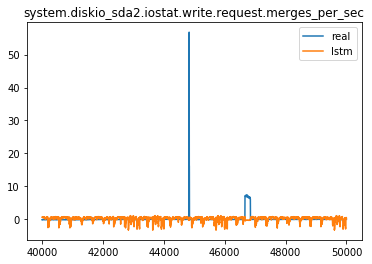

Mean Absolute Error :  0.833845161268828


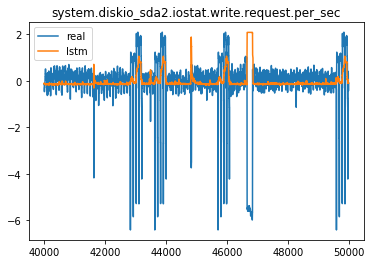

Mean Absolute Error :  0.6238836509098392


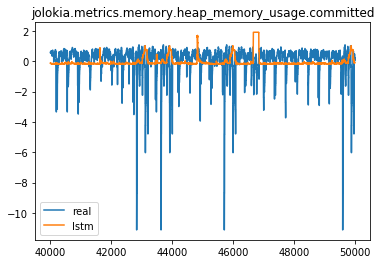

Mean Absolute Error :  0.8431755589648343


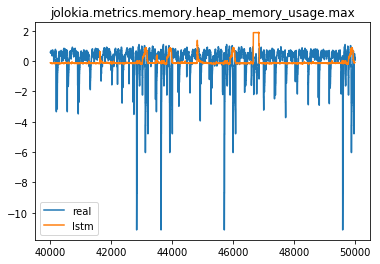

Mean Absolute Error :  0.8393562978654647


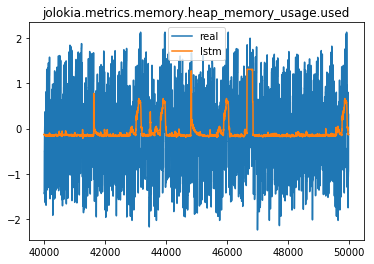

Mean Absolute Error :  0.8459315027533775


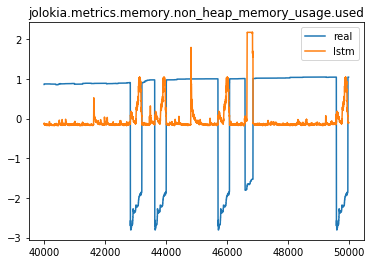

Mean Absolute Error :  1.3712594443637267


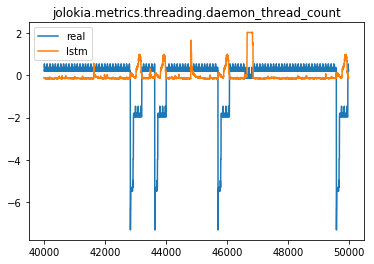

Mean Absolute Error :  0.8283923934945191


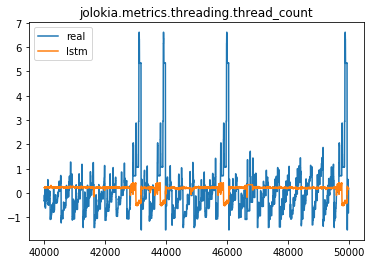

Mean Absolute Error :  0.8274251914465289


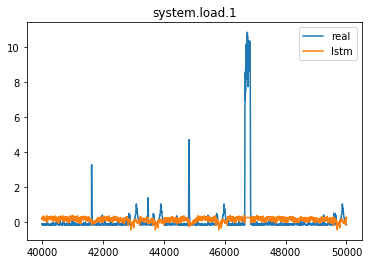

Mean Absolute Error :  0.44082405713644957


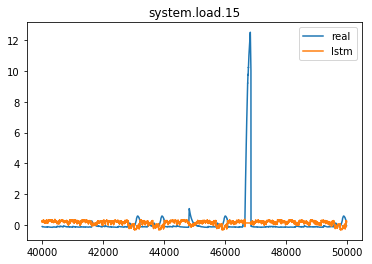

Mean Absolute Error :  0.47074362372978207


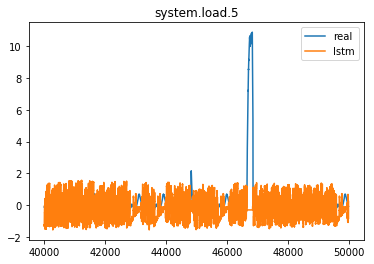

Mean Absolute Error :  0.8918583827328669


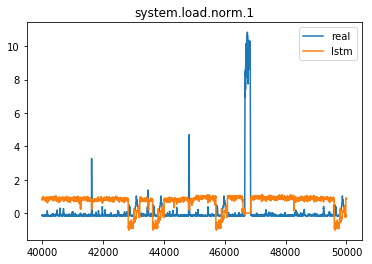

Mean Absolute Error :  1.0754398344333715


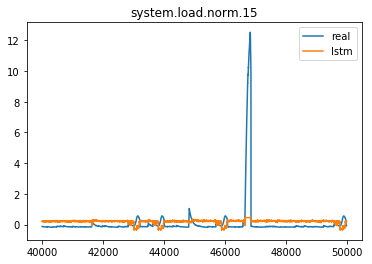

Mean Absolute Error :  0.4994095863920968


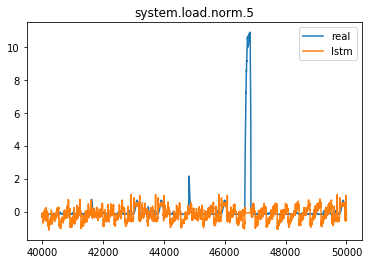

Mean Absolute Error :  0.48090908309312164


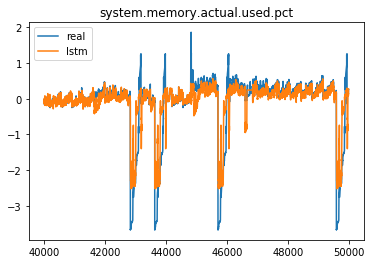

Mean Absolute Error :  0.21843635541463263


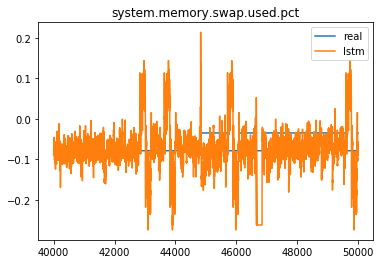

Mean Absolute Error :  0.04280950300902791


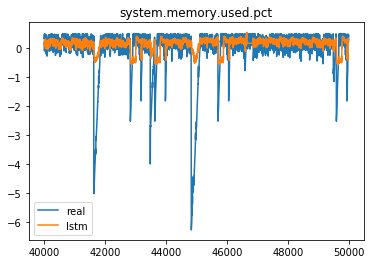

Mean Absolute Error :  0.3400668452439552


In [143]:
f = pyplot.figure()
for i in range(test_dataset_shifted.shape[1]):
    pyplot.plot(test_dataset_shifted[test_dataset_shifted.columns[i]], label='real')
    pyplot.plot(test_dataset_predicted_pd[test_dataset_predicted_pd.columns[i]], label='lstm')
    pyplot.legend()
    pyplot.title(test_dataset_shifted.columns[i])
    pyplot.show()
    print("Mean Absolute Error : ",mean_absolute_error(test_dataset_shifted[test_dataset_shifted.columns[i]], test_dataset_predicted_pd[test_dataset_predicted_pd.columns[i]]))